## 线性回归代码实现

In [28]:
import numpy as np
import matplotlib.pyplot as plt

##### 定义一个加载数据的函数

In [1]:
def loaddata():
    data = np.loadtxt('data/2_4.txt',delimiter=',')
    n = data.shape[1]-1 #特征数
    X = data[:,0:n]
    y = data[:,-1].reshape(-1,1)
    return X,y

In [4]:
X, y = loaddata()
X[:5]
y[:5]

array([[6.1101],
       [5.5277],
       [8.5186],
       [7.0032],
       [5.8598]])

array([[17.592 ],
       [ 9.1302],
       [13.662 ],
       [11.854 ],
       [ 6.8233]])

##### 特征标准化

In [7]:
def featureNormalize(X):
    mu = np.average(X, axis=0)
    sigma = np.std(X, axis=0, ddof=1)
    X = (X - mu) / sigma
    return X, mu, sigma

##### 计算损失函数
$$h_{\theta}(x)=\sum_{i=0}^{n} \theta_{i} x_{i}=\theta^{T}x  \text{ 其中}x_{0}=1 $$
$$L(\theta)=\left(h_{\theta}(x)-y\right)^{2}$$

In [9]:
def computeCost(X,y,theta):
    m = X.shape[0]
    return np.sum(np.power(np.dot(X,theta)-y,2))/(2*m)

#### 梯度下降法求解
$$\begin{array}{l}
\frac{\partial}{\partial \theta_{j}} J(\theta)=\frac{\partial}{\partial \theta_{j}} \frac{1}{2 m} \sum_{i=1}^{m}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)^{2} \\
=2 * \frac{1}{2 m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \frac{\partial}{\partial \theta_{j}}\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right)\right] \\
=\frac{1}{m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) \frac{\partial}{\partial \theta_{j}}\left(\sum_{f=0}^{n} \theta_{f} x_{f}^{(i)}-y^{(i)}\right)\right] \\
=\frac{1}{m} \sum_{i=1}^{m}\left[\left(h_{\theta}\left(x^{(i)}\right)-y^{(i)}\right) x_{j}^{(i)}\right] \\
\theta_{j}:=\theta_{j}+\alpha \frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)}
\end{array}$$   
$$\text{故：    }\theta_{j}=\theta_{j}+\alpha \frac{1}{m} \sum_{i=1}^{m}\left(y^{(i)}-h_{\theta}\left(x^{(i)}\right)\right) x_{j}^{(i)}$$

In [40]:
def gradientDescent(X,y,theta,iterations,alpha):
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)#对原始数据加入一个全为1的列
    m = X.shape[0]
    n = X.shape[1]
    costs=np.zeros(iterations)
    for idx, num in enumerate(range(iterations)):
        for j in range(n):
            theta[j] = theta[j]+(alpha/m)*(np.sum(y-np.dot(X,theta)*X[:,j].reshape(-1,1)))
        costs[num] = computeCost(X,y,theta)
        if idx % 100 == 0:
            print(f"第{idx+1}次迭代，theta: {theta}, costs: {costs[num]}")
    return theta,costs

In [41]:
##### 预测函数

In [42]:
def predict(X):
    X = (X-mu)/sigma
    c = np.ones(X.shape[0]).transpose()
    X = np.insert(X,0,values=c,axis=1)
    return np.dot(X,theta)

In [43]:
X,y = loaddata()
X,mu,sigma = featureNormalize(X)
theta = np.zeros(X.shape[1]+1).reshape(-1,1)
iterations = 400
alpha = 0.01
theta,costs = gradientDescent(X,y,theta,iterations,alpha)
# theta = gradientDescent(X,y,theta,iterations,alpha)

第1次迭代，theta: [[0.05839135]
 [0.05839135]], costs: 31.468363020154566
第101次迭代，theta: [[3.7231959]
 [3.7393754]], costs: 7.09662708877999
第201次迭代，theta: [[5.06463289]
 [5.10083779]], costs: 4.892788274391381
第301次迭代，theta: [[5.55564221]
 [5.60439331]], costs: 4.9996992567219


##### 画损失函数图

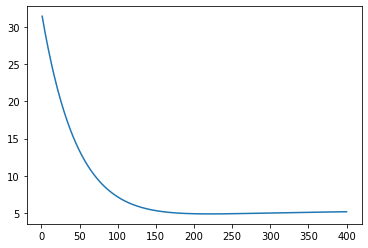

In [44]:
x_axis = np.linspace(1,iterations,iterations)
plt.plot(x_axis,costs[0:iterations])

##### 画数据散点图和求得的直线

In [45]:
print(theta)

[[5.73431935]
 [5.78954748]]


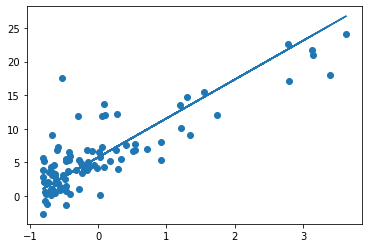

In [46]:
plt.scatter(X,y)
h_theta = theta[0]+theta[1]*X
plt.plot(X,h_theta)

##### 预测数据

In [43]:
print(predict([[8.4084]]))

[[6.10623791]]
